# import needed packages 

In [152]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Polygon


# PCA analysis plots 

In [2]:
#open files 
first= open('/Users/cmdb/qbb2020-answers/week_3_homework/first_components.txt')
second=open('/Users/cmdb/qbb2020-answers/week_3_homework/second_components.txt')

In [3]:
#make lists of the PC1 and PC2 
PC1_list=[]
for line in first: 
    split=line.split()
    PC1_list.append(split)
#print(PC1_list)

In [4]:
PC2_list=[]
for line in second: 
    split=line.split()
    PC2_list.append(split)


In [5]:
#make dataframe of PC1 and PC2 for plotting 
PCA_df= pd.DataFrame(np.column_stack([PC1_list, PC2_list]), 
                               columns=['PC1', 'PC2'])

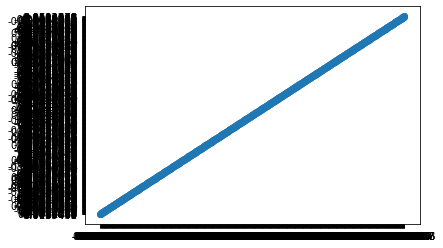

In [6]:
#create plot of PC1 and PC2 
fig, ax = plt.subplots()
ax.scatter(x = PCA_df['PC1'], y = PCA_df['PC2'])

first.close()
second.close()

# visualize allele frequency 

In [7]:
af= open('/Users/cmdb/qbb2020-answers/week_3_homework/renamed_chromosomes.vcf')

In [8]:
#create empty list to append later 
allele_freq_list=[]
#make for loop to read file in line by line and pull out allele frequency and make a list 
for i,line in enumerate(af): 
    if "#" in line: 
        pass
    else: 
        split=line.split(":")
        for j,fields in enumerate(split):
            split2=fields.split("\t")
            for h,fields in enumerate(split2):
                if "AF="in fields:
                    index = fields.index("=")
                    allele_freq_list.append(fields[index+1:])
#print(allele_freq_list)
af.close()

In [9]:
#make dataframe for plotting 
allele_freq_df=pd.DataFrame(allele_freq_list, columns=["Allele Frequency"])

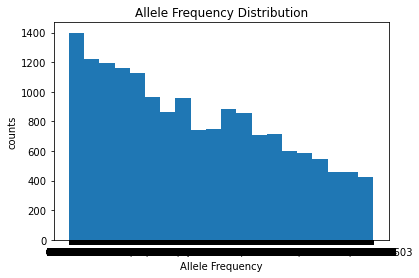

In [16]:
#create histogram:
fig, ax = plt.subplots()
ax.hist(allele_freq_df['Allele Frequency'],bins=20)
ax.set_xlabel('Allele Frequency')
ax.set_ylabel('counts')
ax.title.set_text('Allele Frequency Distribution')

#do density=false 

# Manhattan Plots of association testing

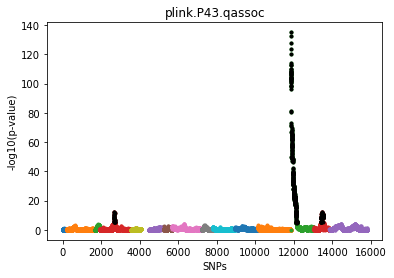

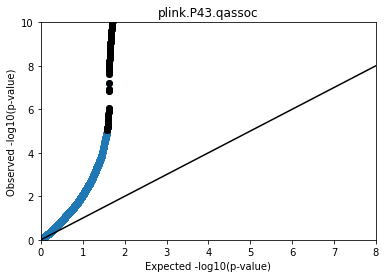

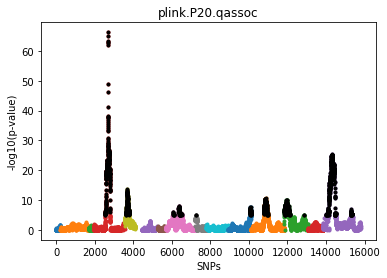

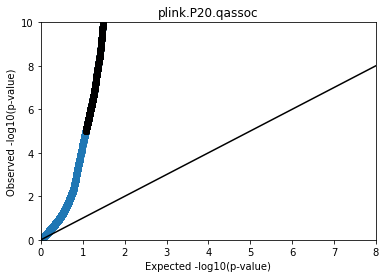

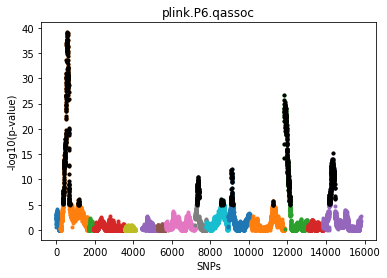

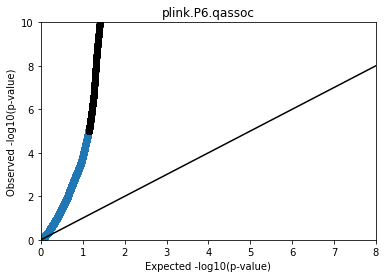

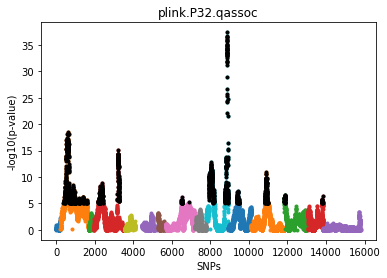

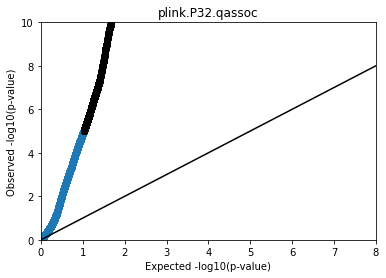

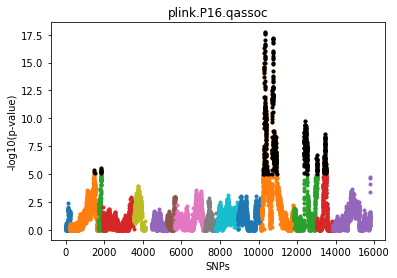

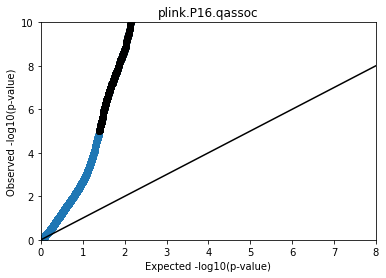

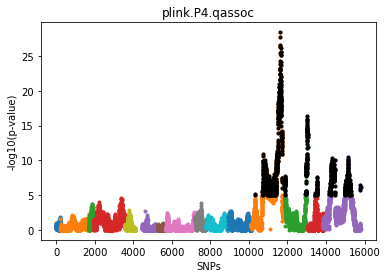

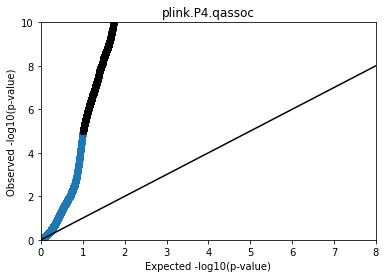

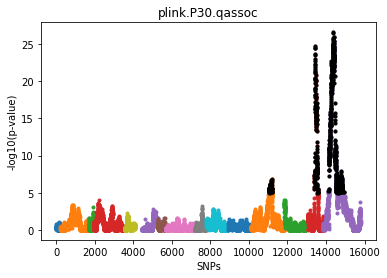

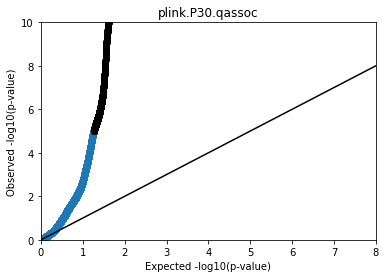

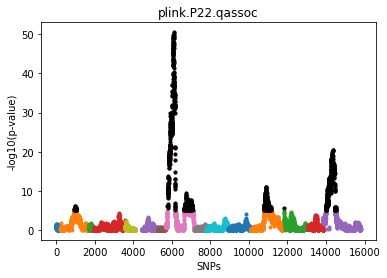

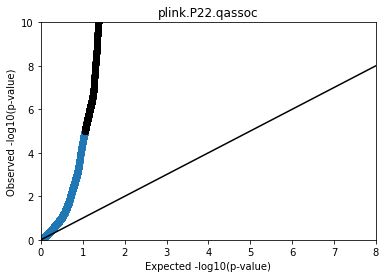

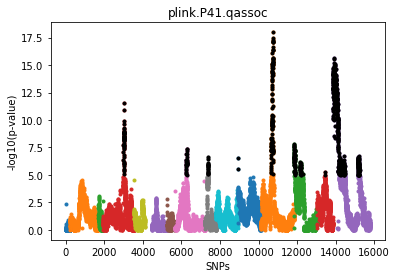

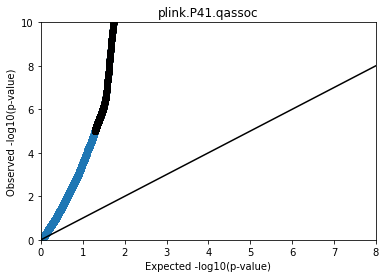

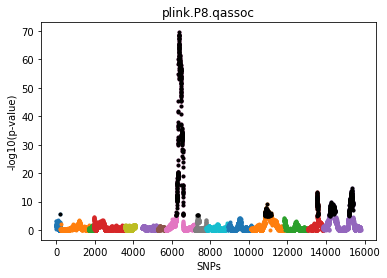

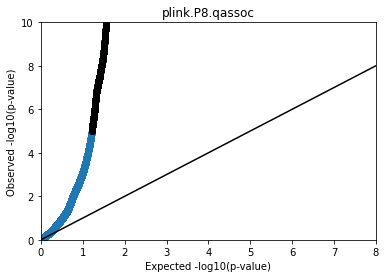

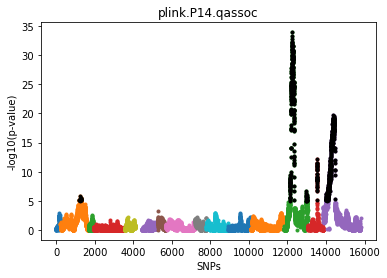

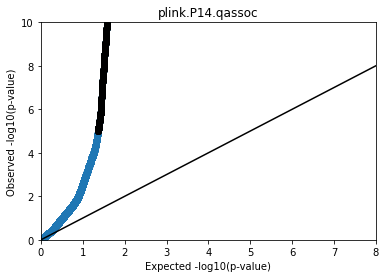

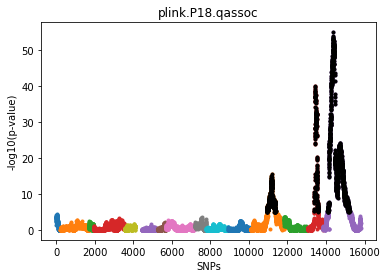

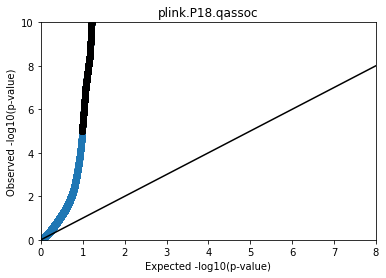

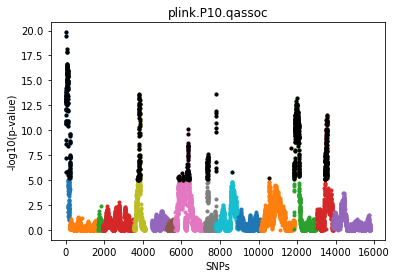

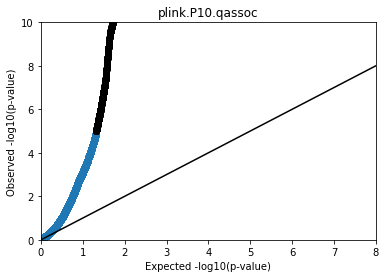

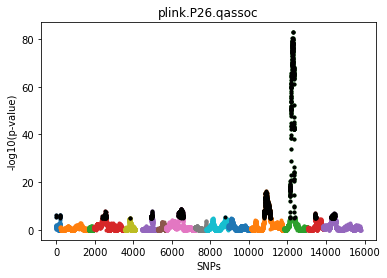

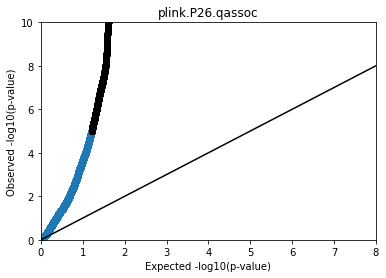

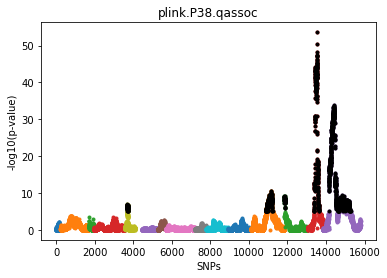

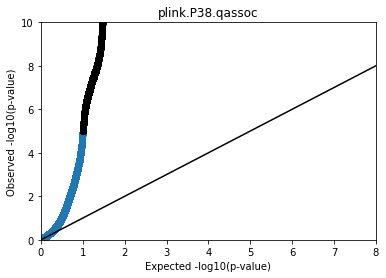

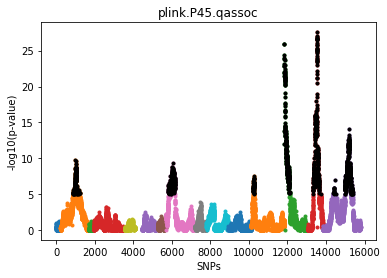

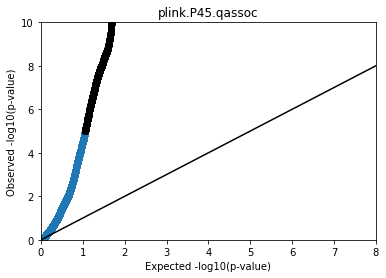

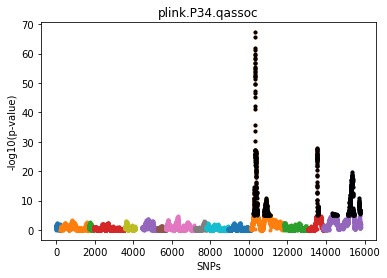

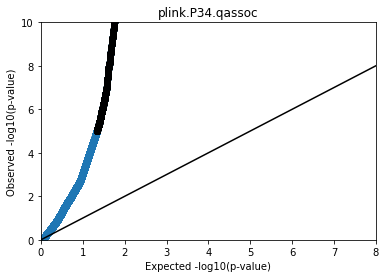

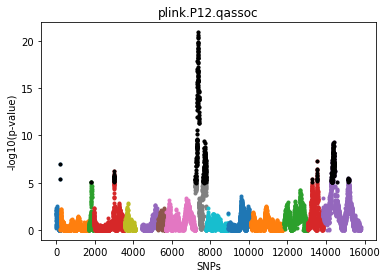

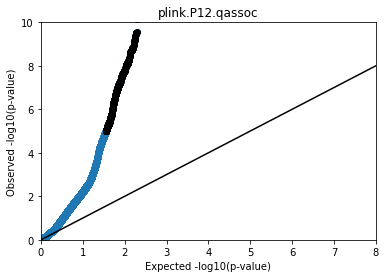

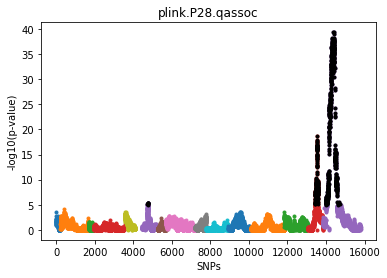

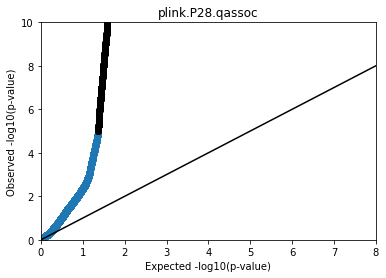

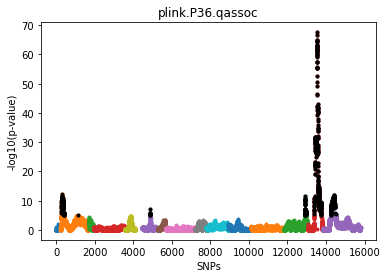

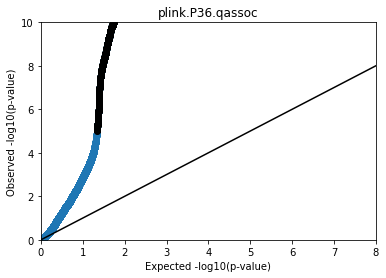

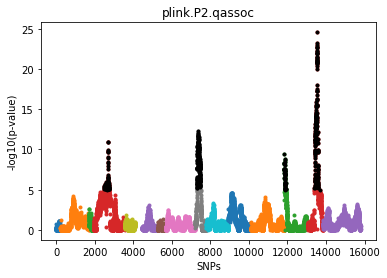

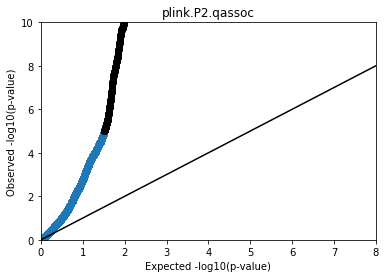

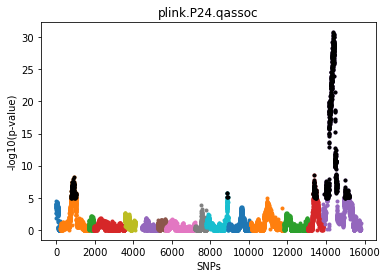

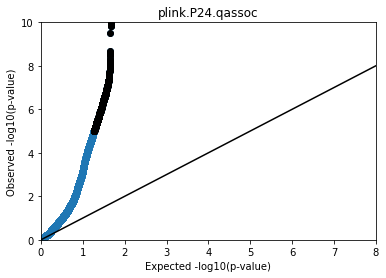

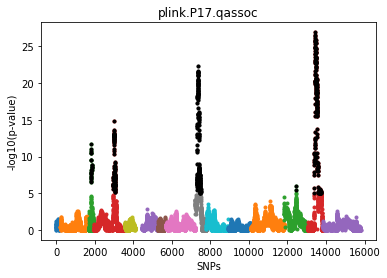

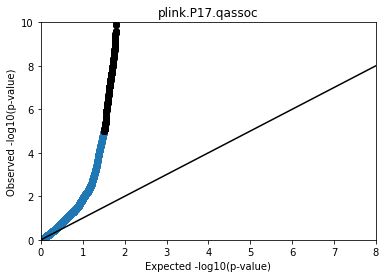

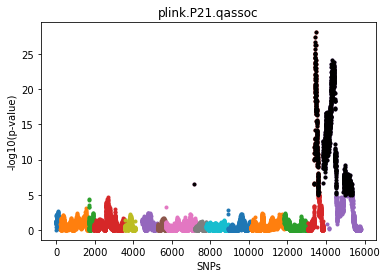

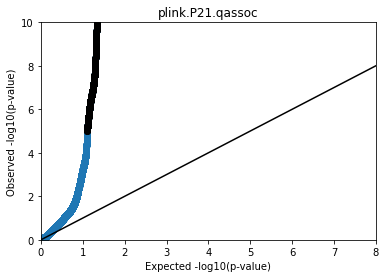

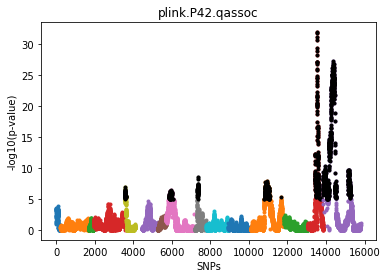

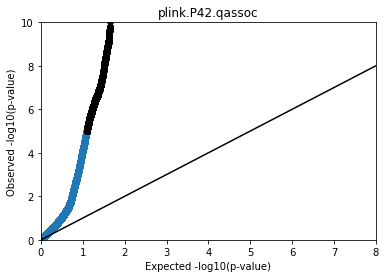

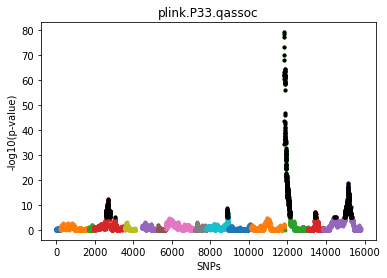

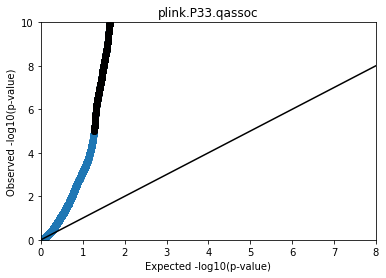

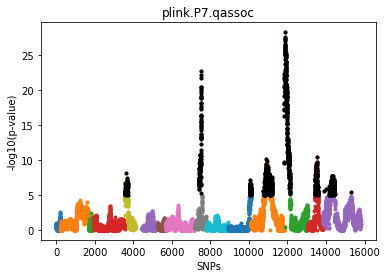

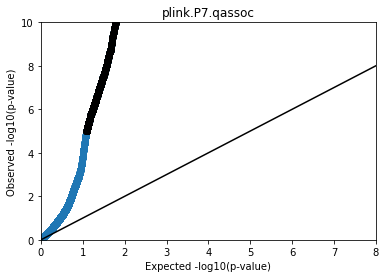

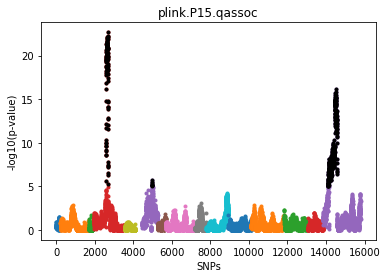

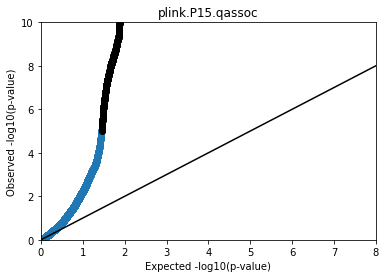

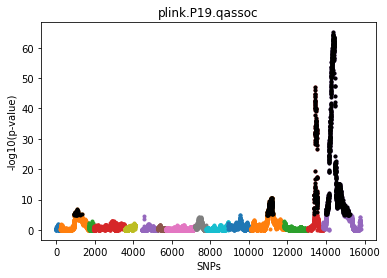

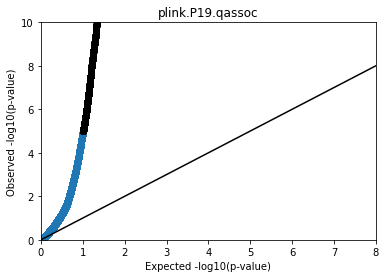

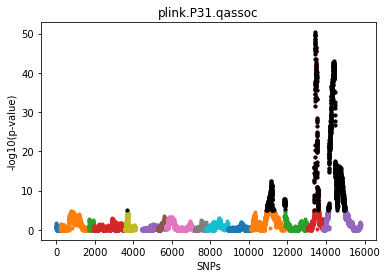

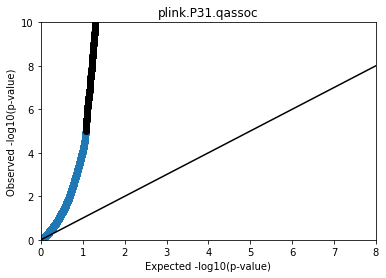

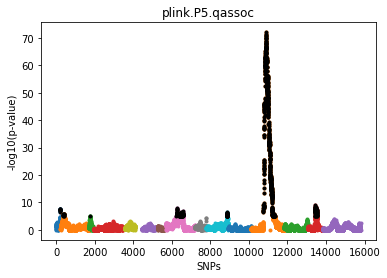

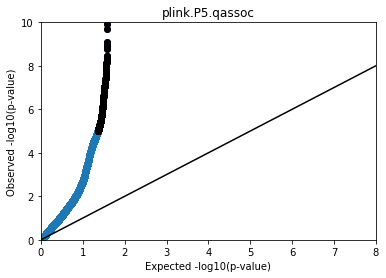

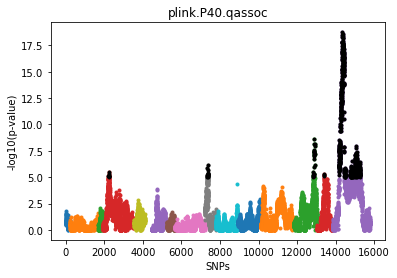

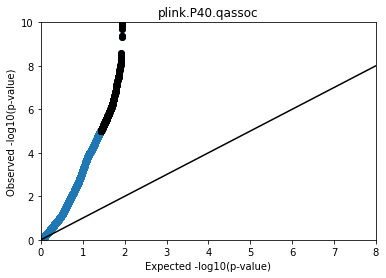

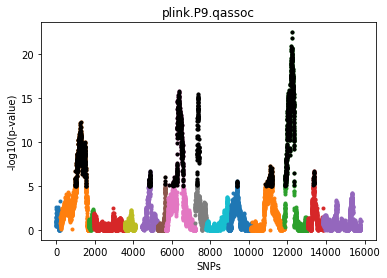

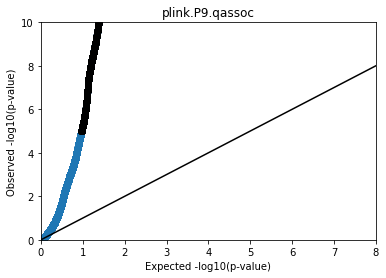

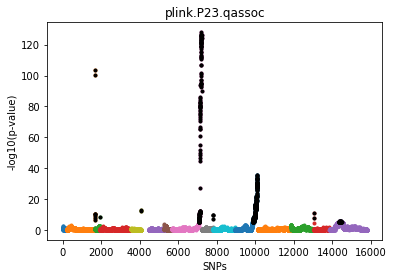

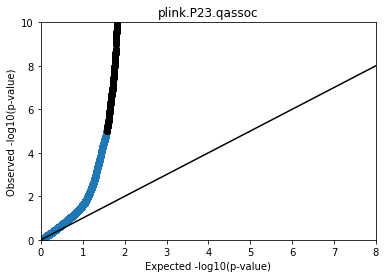

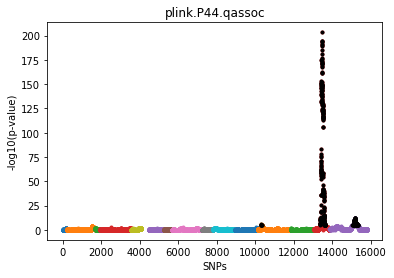

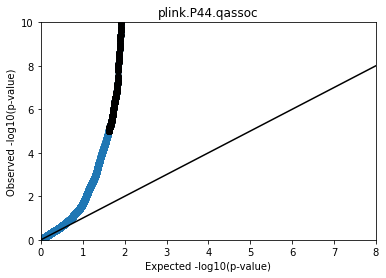

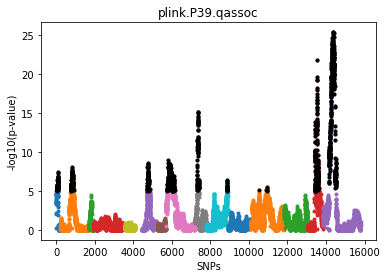

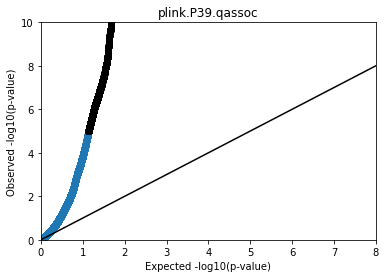

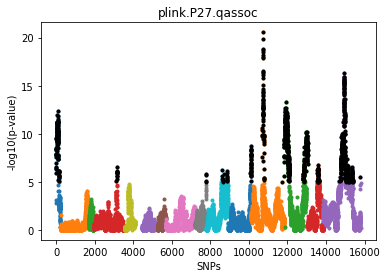

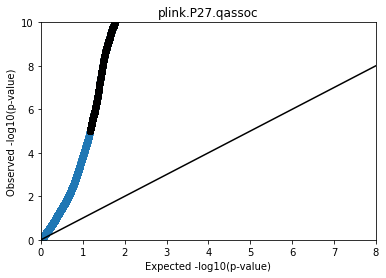

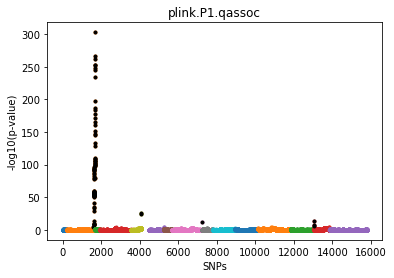

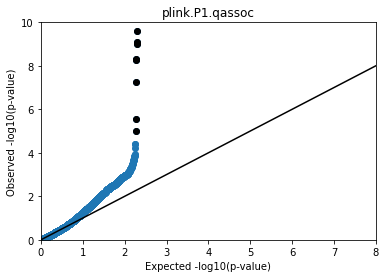

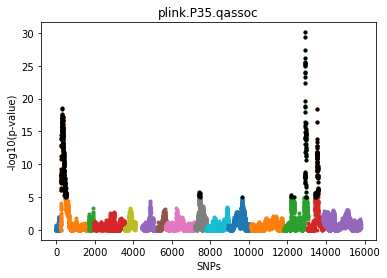

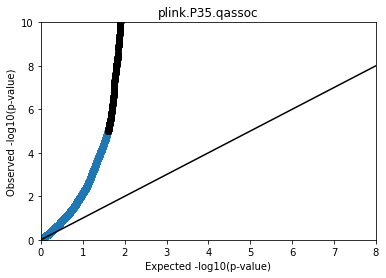

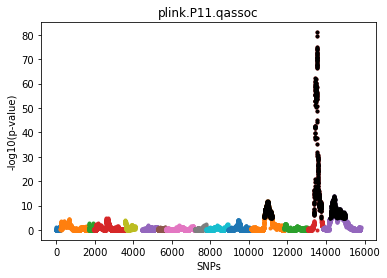

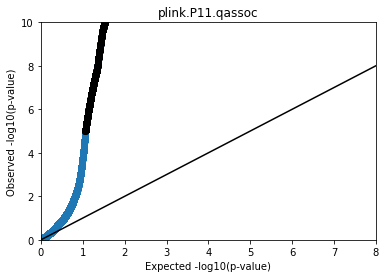

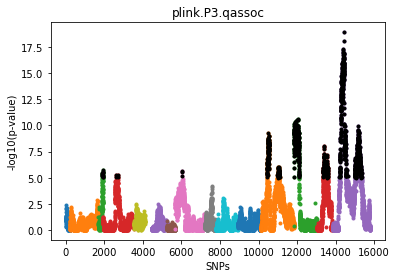

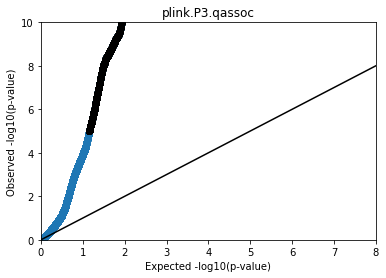

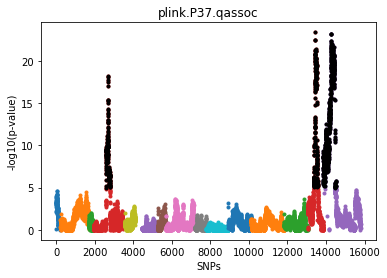

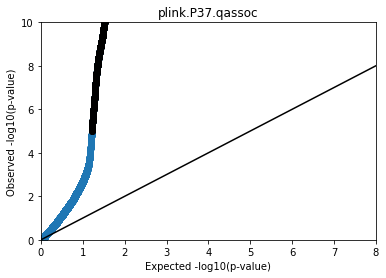

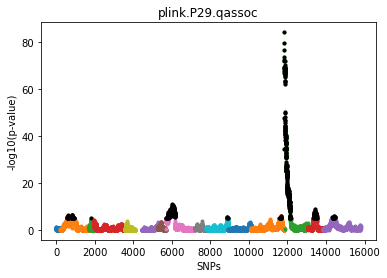

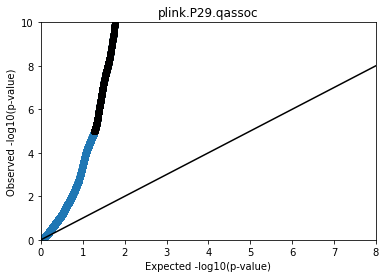

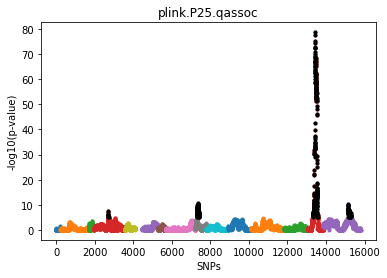

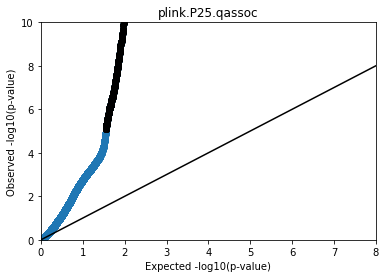

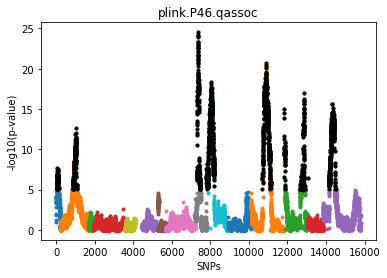

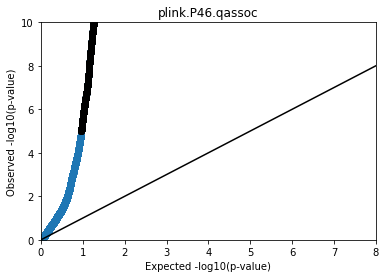

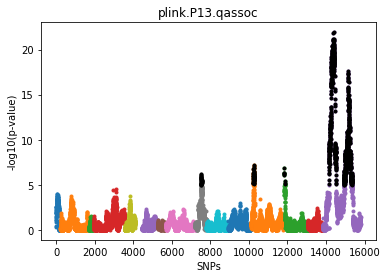

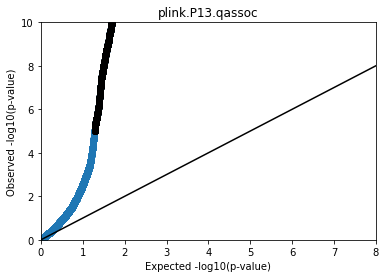

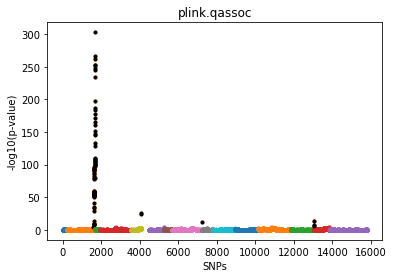

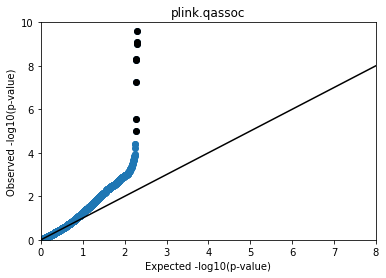

In [53]:

directory = '/Users/cmdb/qbb2020-answers/week_3_homework/'

for filename in os.listdir(directory):
    if filename.endswith(".qassoc"):
        gwas = pd.read_csv(filename, sep = "\s+")
        gwas['logP'] = -1 * np.log10(gwas['P'])
        gwas['snp_index'] = range(len(gwas))
        gwas['snp_index'] = range(len(gwas))
        
        
        #create sub data frame that has a different color 
        sub=gwas.query('logP>5')
        

        fig, ax = plt.subplots()

        for chr in range(1, 16):
            ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')
            #plot sub dataframe as different color 
            ax.scatter(sub["snp_index"][sub["CHR"] == chr], sub["logP"][sub["CHR"] == chr], marker = '.', color="black")
        plt.xlabel("SNPs")
        plt.ylabel("-log10(p-value)")
        plt.title(filename)
    
        plt.show()
        
            
        gwas_sorted = gwas.sort_values(by = "P")
        gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
        gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
        gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])

        gwas['snp_index'] = range(len(gwas))
        
        sub2=gwas_sorted.query('logP>5')

        fig, ax = plt.subplots()

        ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
        ax.scatter(sub2["uniform_logP"], sub2["logP"], color="black")
        
        ax.plot([8,0], [8, 0], color = "black")

        plt.xlim([0, 8])
        plt.ylim([0, 10])
        plt.xlabel("Expected -log10(p-value)")
        plt.ylabel("Observed -log10(p-value)")
        plt.title(filename)
    
        plt.show()
        
    else:
        continue


# SNP Boxplot

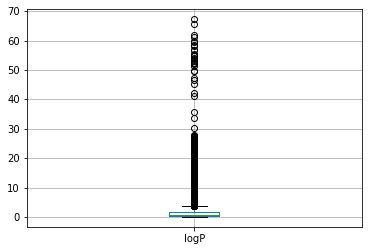

In [162]:
directory = '/Users/cmdb/qbb2020-answers/week_3_homework/'

for filename in os.listdir(directory):
    if filename.startswith("plink.P34"):
        gwas = pd.read_csv(filename, sep = "\s+")
        gwas['logP'] = -1 * np.log10(gwas['P'])
        gwas['snp_index'] = range(len(gwas))
        gwas['snp_index'] = range(len(gwas))
        
        
        gwas.boxplot('logP')
        #data=gwas['logP']


[]
